In [2]:
import pymc as pm
# import arviz as az
# import graphviz as gr
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# from packaging import version

# # import the new functionality
# from pymc.model.transform.conditioning import do

# RANDOM_SEED = 123
# rng = np.random.default_rng(RANDOM_SEED)
# az.style.use("arviz-darkgrid")
# %config InlineBackend.figure_format = 'retina'

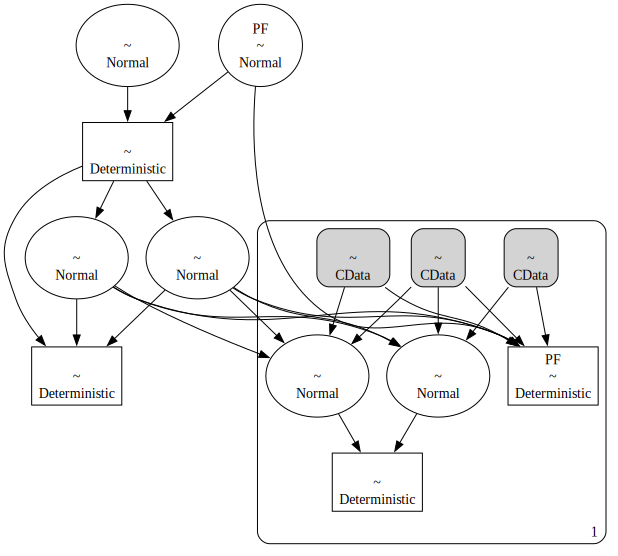

In [3]:
with pm.Model() as model_test:
    PF가격 = pm.Normal("PF가격")
    대여가격 = pm.Normal("대여가격")
    총가격 = pm.Deterministic("총가격", PF가격 + 대여가격)
    
    구매여부 = pm.Normal("구매여부", 총가격)
    구매시간 = pm.Normal("구매시간", 총가격)
    
    매출 = pm.Deterministic("매출", 구매여부 * 총가격 * 구매시간)
    
    나이 = pm.Data("나이", value = [0])
    클럽레벨 = pm.Data("클럽레벨", value = [0])
    차급 = pm.Data("차급", value = [0])
    
    사고여부 = pm.Normal("사고여부", 구매여부*(구매시간 + 나이 + 클럽레벨))
    사고크기 = pm.Normal("사고크기", 구매여부*(구매시간 + 나이 + 차급))
    
    사고액 = pm.Deterministic("사고액", 사고여부 * 사고크기)
    PF매출 = pm.Deterministic("PF매출", PF가격*구매여부*(구매시간 + 나이 + 클럽레벨 + 차급))

pm.model_to_graphviz(model_test)


In [ ]:
- linear mopdeling
- PF가격을 위에서 결정하도록 그래프 옮기기